In [5]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import os


## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## deep learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
car_train = glob(r'/content/drive/My Drive/vehicle_classification_anpr/archive/car_data/car_data/train/*/*')
cars_test = glob(r'/content/drive/My Drive/vehicle_classification_anpr/archive/car_data/car_data/test/*/*')

In [8]:
def get_car_class(car):
    car_class = car.replace("/","").replace("\\","")[84::][:-9]
    return car_class

def get_test_car_class(car):

  car_class = car.replace("/","").replace("\\","")[83::][:-9]
  return car_class

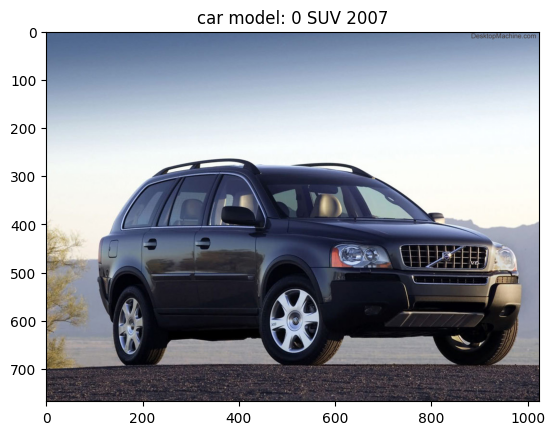

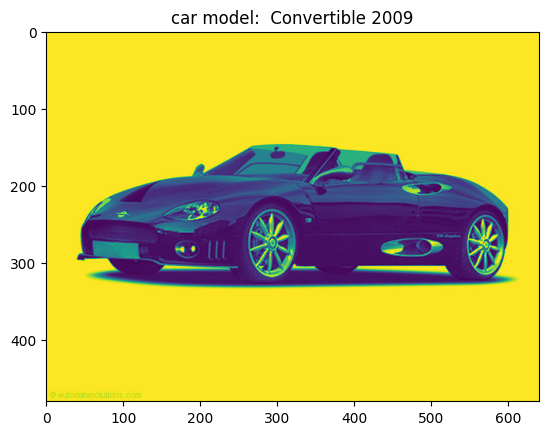

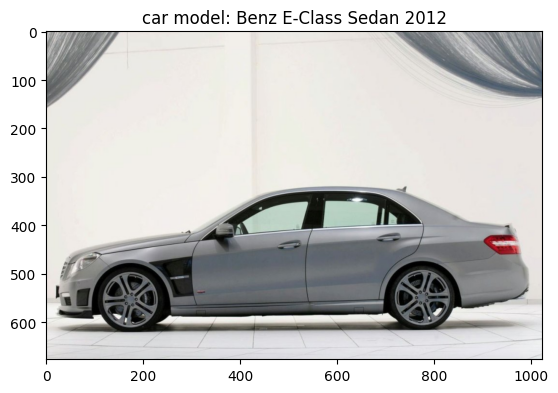

In [9]:
for i in range(1,2100,700):
    image = Image.open(car_train[i])
    label = get_car_class(car_train[i])
    imgplot = plt.imshow(image)
    plt.title(f"car model: {label}")
    plt.show()


In [10]:

y_train = []
y_test = []

for i in range(len(car_train)):
  y_train.append(get_car_class(car_train[i]))
for i in range(len(cars_test)):
  y_test.append(get_test_car_class(cars_test[i]))


In [11]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels


Cars   Make  Year
0     0 SUV 2007      0  2007
1     0 SUV 2007      0  2007
2     0 SUV 2007      0  2007
3     0 SUV 2007      0  2007
4     0 SUV 2007      0  2007
...          ...    ...   ...
8139  Sedan 2012  Sedan  2012
8140  Sedan 2012  Sedan  2012
8141  Sedan 2012  Sedan  2012
8142  Sedan 2012  Sedan  2012
8143  Sedan 2012  Sedan  2012

[8144 rows x 3 columns]

In [12]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]
df_test_labels

Cars   Make  Year
0     n Golf Hatchback 2012      n  2012
1     n Golf Hatchback 2012      n  2012
2     n Golf Hatchback 2012      n  2012
3     n Golf Hatchback 2012      n  2012
4     n Golf Hatchback 2012      n  2012
...                     ...    ...   ...
8036             Sedan 2012  Sedan  2012
8037             Sedan 2012  Sedan  2012
8038             Sedan 2012  Sedan  2012
8039             Sedan 2012  Sedan  2012
8040             Sedan 2012  Sedan  2012

[8041 rows x 3 columns]

In [13]:
model_names = list(df_test_labels["Cars"].unique())

In [14]:
df_train_labels.to_csv(r'/content/drive/My Drive/vehicle_classification_anpr/archive/car_data/car_data/train_labels.csv')
df_test_labels.to_csv(r'/content/drive/My Drive/vehicle_classification_anpr/archive/car_data/car_data/test_labels.csv')

In [24]:
import seaborn as sns

In [13]:
!pip install seaborn

In [20]:
import seaborn as sns

(Text(0, 0.5, 'count'),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108]),
  [Text(0, 0, ''),
   Text(1, 0, 'Benz'),
   Text(2, 0, 'ies'),
   Text(3, 0, 'edan'),
   Text(4, 0, '0'),
   Text(5, 0, 'oupe'),
   Text(6, 0, 'n'),
   Text(7, 0, 'ontinental'),
   Text(8, 0, 'ni'),
   Text(9, 0, 'tin'),
   Text(10, 0, 'V'),
   Text(11, 0, 'Sedan'),
   Text(12, 0, 'ce'),
   Text(13, 0, 'a'),
   Text(14, 0, 'ango'),
   Text(15, 0

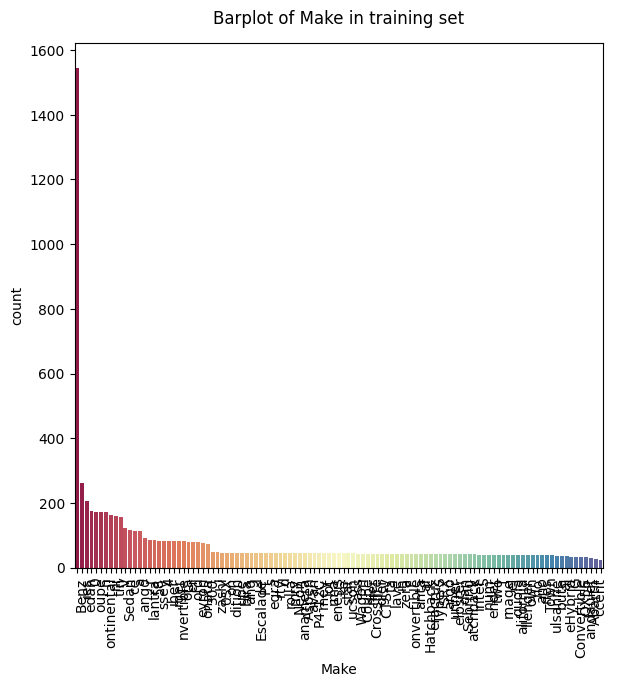

In [26]:
fig = plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(x='Make',data=df_train_labels,order=df_train_labels['Make'].value_counts().index,palette="Spectral")
plt.title('Barplot of Make in training set',y=1.02)
plt.ylabel('count') , plt.xticks(rotation = 90)

NameError: ignored

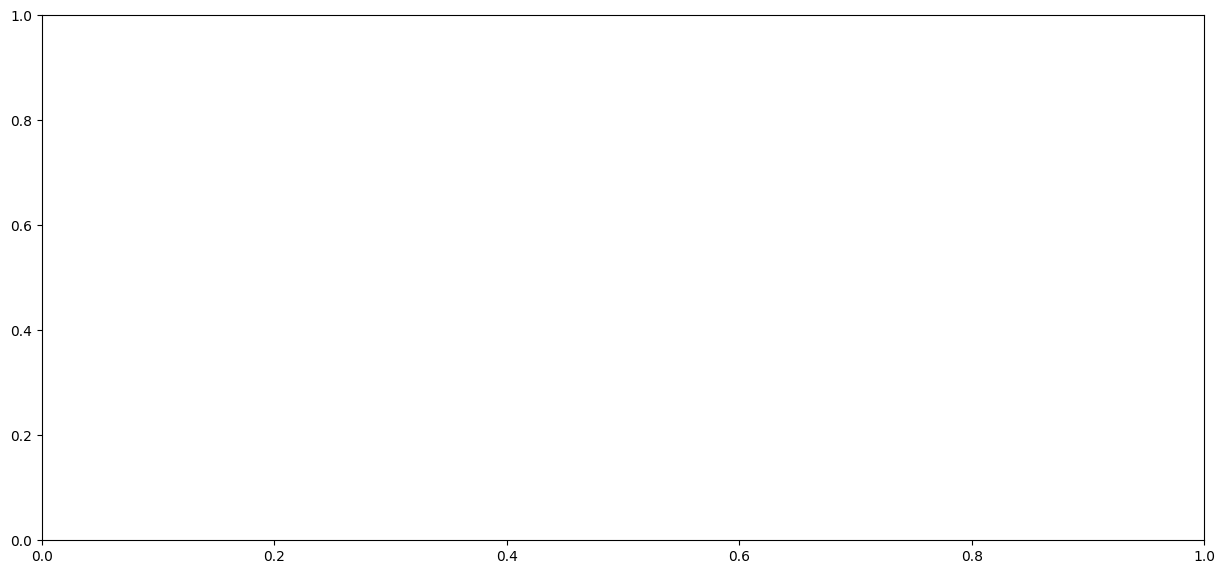

In [15]:
fig = plt.figure(figsize=(15,15))
plt.subplot(2,1,2)
sns.countplot(x='Make',data=df_test_labels,order=df_test_labels['Make'].value_counts().index,palette="Spectral")
plt.title('Barplot of Make in test set',y=1.02)
plt.ylabel('count') , plt.xticks(rotation = 90) , plt.tight_layout()
plt.show()


In [16]:
sns.countplot(x='Year', data = df_train_labels, order = df_train_labels['Year'].value_counts().index, palette = "Spectral")
plt.title('Barplot of production year of cars', y = 1.02)
plt.xticks(rotation = 90)
plt.show()

NameError: ignored

In [17]:
img_size = [128,128]
resized_images = []
def image_to_np_array(file):
    img = Image.open(file)
    resized_image = img.resize(img_size)
    resized_images.append(resized_image)
    resized_image = list(resized_image.getdata())

    if np.shape(resized_image)[:] != (16384,3):
        img = img.convert('YCbCr')
        resized_image=img.resize(img_size)
        resized_image=list(resized_image.getdata())
    map(list(),resized_image)
    resized_image=np.array(resized_image)
    img_shape = resized_image.shape[0] * resized_image.shape[1]
    flatten_img=resized_image.reshape(1,img_shape)
    return flatten_img[0]

In [18]:
X_train = []
y_train = []
for i in range(len(car_train[i])):
    X_train.append(image_to_np_array(car_train[i]))
    y_train.append(get_car_class(car_train[i]))


In [31]:
X_test = []
y_test = []


for i in range(len(cars_test[i])):
    X_test.append(image_to_np_array(cars_test[i]))
    y_test.append(get_test_car_class(cars_test[i]))


In [32]:
pca = PCA()
pca.fit(X_train)

PCA()

In [33]:

n_comp = 124
pca = PCA(n_comp)
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)
print(np.sum(pca.explained_variance_ratio_[:150]))


1.0


In [34]:
clf_PCA = LinearSVC(C=1e-9)
clf_PCA.fit(PCA_X_train,y_train)
print('Accuracy on training set',clf_PCA.score(PCA_X_train,y_train))
print('Accuracy on test set',clf_PCA.score(PCA_X_test,y_test))

Accuracy on training set 0.9354838709677419
Accuracy on test set 0.3418803418803419


In [35]:
def SVM_Evaluation(X_train,y_train,X_test,y_test,clf):
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train_pred,y_train)
    test_accuracy = accuracy_score(y_test_pred,y_test)
    print('Accuracy on train data' , train_accuracy)
    print('Accuray on test data',test_accuracy)
    return None

In [36]:
clf_rbf = SVC(kernel='rbf',gamma='auto')
SVM_Evaluation(X_train,y_train,X_test,y_test,clf_rbf)

Accuracy on train data 1.0
Accuray on test data 0.36752136752136755


In [37]:
random_forest = RandomForestClassifier(n_estimators=200,max_depth=50)
random_forest.fit(X_train,y_train)
ytest_labels_rf = random_forest.predict(X_test)
ytest_prob_rf = random_forest.predict_proba(X_test)
train_score_rf = random_forest.score(X_train, y_train)
test_score_rf = random_forest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(test_score_rf))

Train Score for the Random Forest Classifier: 1.000
Test Score for the Random Forest Classifier: 0.368


In [38]:

print(classification_report(y_test, random_forest.predict(X_test)))


                       precision    recall  f1-score   support

       Hatchback 2012       0.44      0.61      0.51        31
           0 SUV 2007       0.53      0.56      0.55        43
n Golf Hatchback 1991       0.00      0.00      0.00         0
n Golf Hatchback 2012       0.00      0.00      0.00        43

             accuracy                           0.37       117
            macro avg       0.24      0.29      0.26       117
         weighted avg       0.31      0.37      0.34       117



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [39]:
img_width , img_height = 224,224
train_samples = len(car_train)
validation_samples = len(cars_test)
n_classes = len(model_names)
batch_size = 32

In [40]:
from keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True

)
test_data_generator = ImageDataGenerator(rescale=1. / 255)

In [19]:
train_path = r"/content/drive/My Drive/vehicle_classification_anpr/archive/car_data/car_data/train"
test_path = r"/content/drive/My Drive/vehicle_classification_anpr/archive/car_data/car_data/test"

In [42]:
train_gen = train_data_generator.flow_from_directory(
    train_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_gen = test_data_generator.flow_from_directory(
    test_path,
    target_size = (img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [43]:
vgg16_model = VGG16(include_top=False,input_shape=(224,224,3))
for layer in vgg16_model.layers:
    layer.trainable = False
x = Flatten()(vgg16_model.layers[-1].output)
x = Dense(196,activation='relu' , kernel_initializer = 'he_uniform')(x)
output = Dense(len(train_gen.class_indices),activation = 'softmax')(x)
model = Model(inputs=vgg16_model.inputs,outputs=output)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
history = model.fit(train_gen,steps_per_epoch=len(train_gen),validation_data=validation_gen,validation_steps=len(train_gen),epochs=20)

In [44]:
base_model = efficientnet.EfficientNetB1(weights='imagenet',include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
predictions = Dense(196,activation='softmax')(x)
model_2 = Model(inputs=base_model.input,outputs=predictions)
for layer in base_model.layers:
    if isinstance(layer,BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False




27018416/27018416 [==============================] - 1s 0us/step


In [45]:
import tensorflow as tf

In [46]:
model_2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history2 = model_2.fit_generator(
    generator = train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=validation_gen,
    validation_steps=len(validation_gen),
    epochs=25)

<ipython-input-47-422ad178229d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model_2.fit_generator(


Epoch 1/25
255/255 [==============================] - ETA: 0s - loss: 3.8755 - accuracy: 0.1983 

In [ ]:
def predict_class(model):
    image_batch , classes_batch = next(validation_gen)
    predicted_batch = model.predict(image_batch)
    for i in range(0,10):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred==the_class)
        plt.title(str(isTrue) + 'class:' + value + '-' + 'predicted:' + predicted + 'with probability of:' + str(val_pred)[:4])
        plt.imshow(image)



1/1 [==============================] - 5s 5s/step


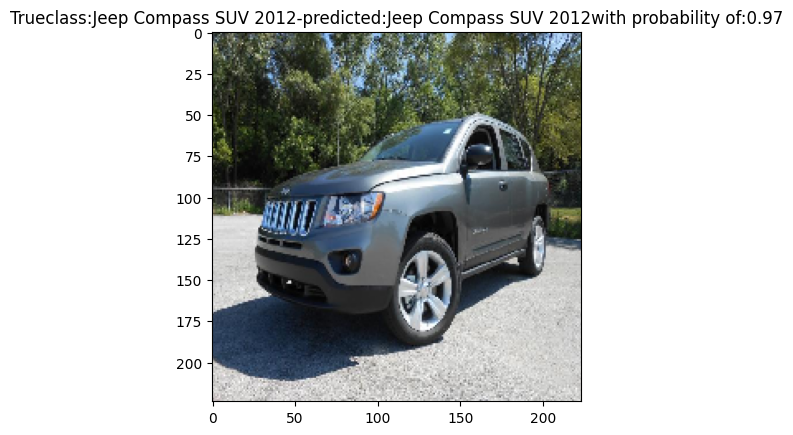

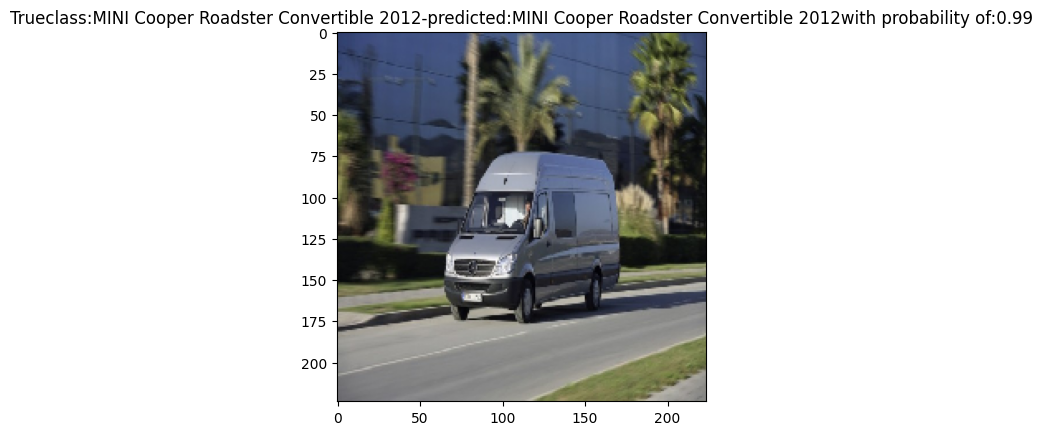

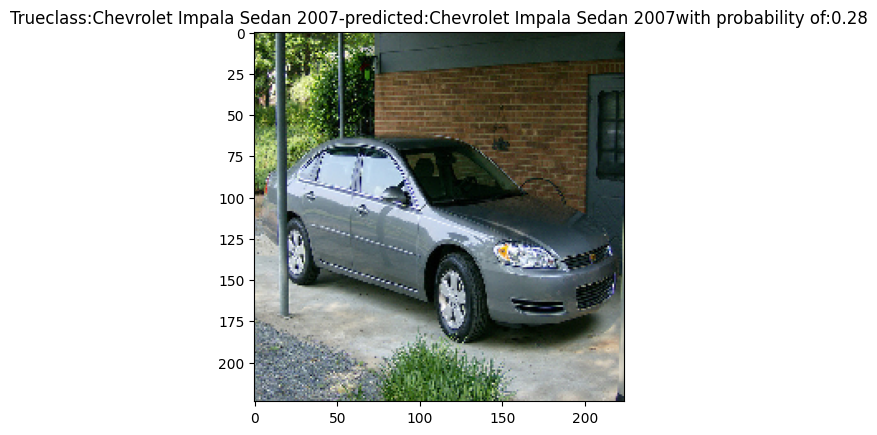

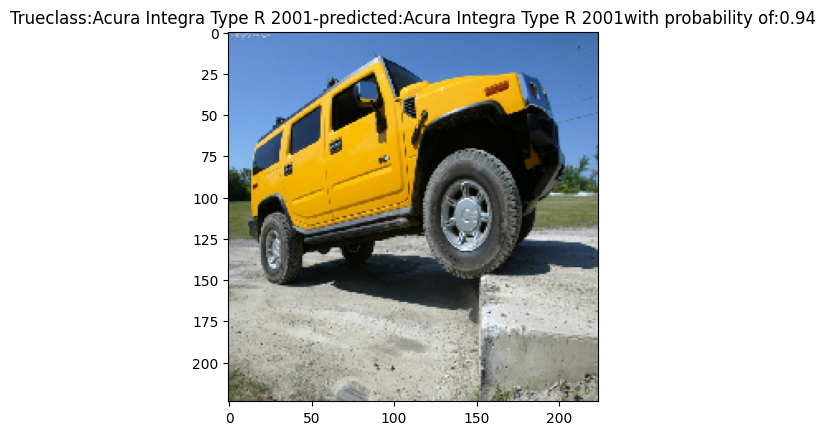

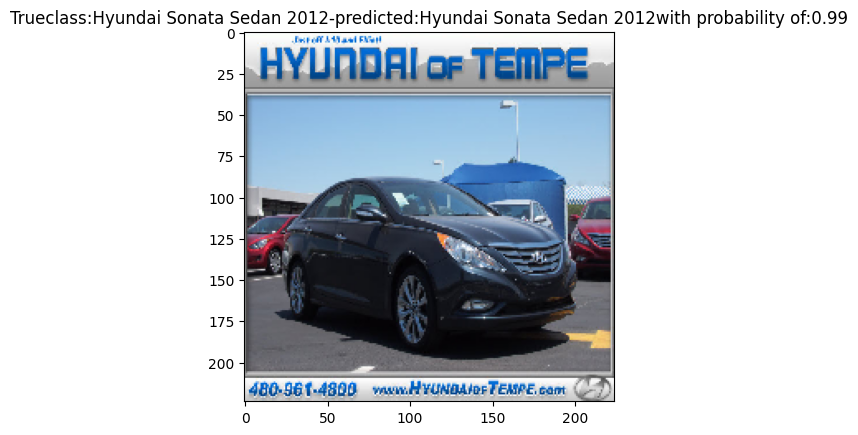

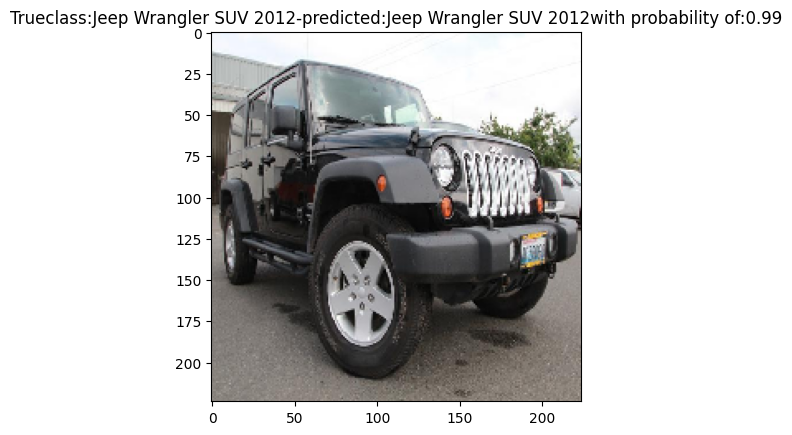

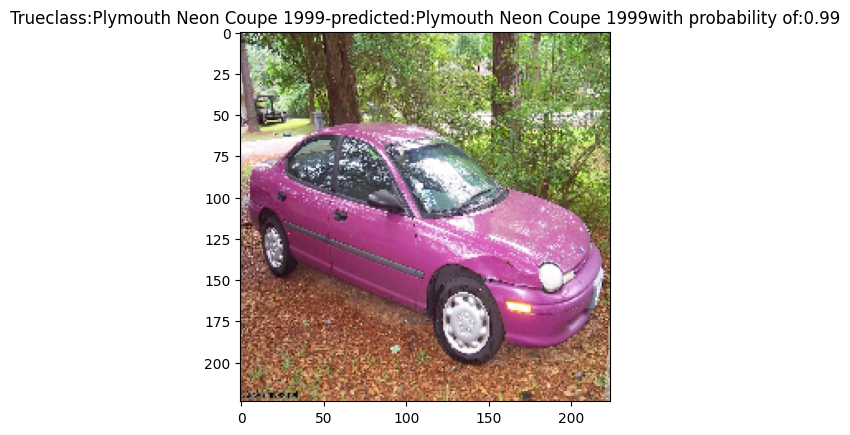

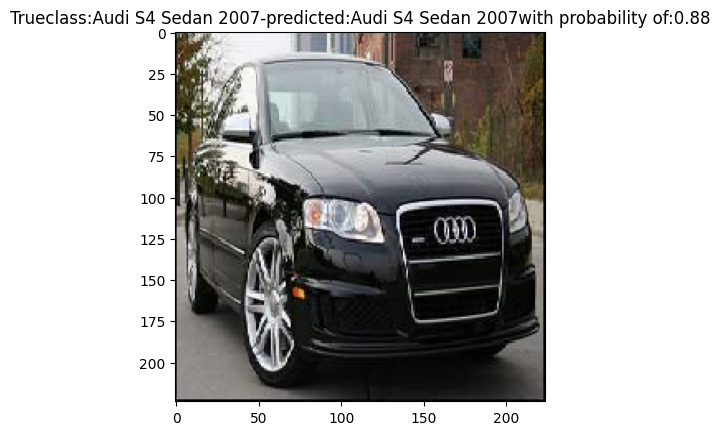

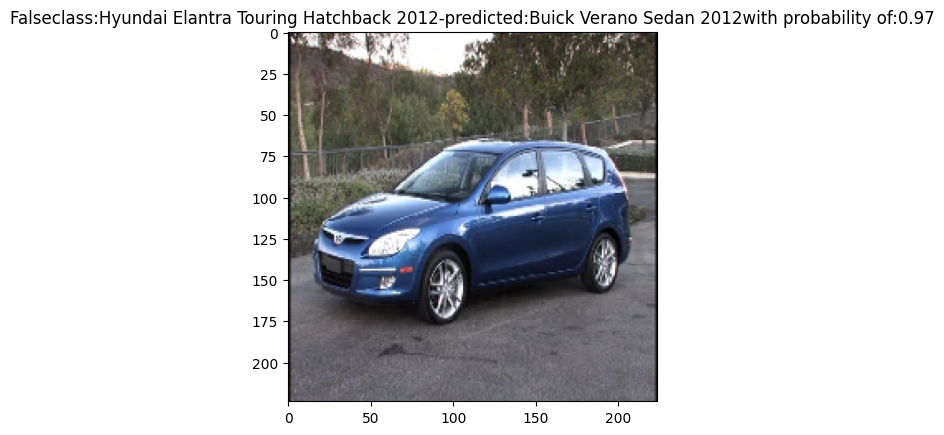

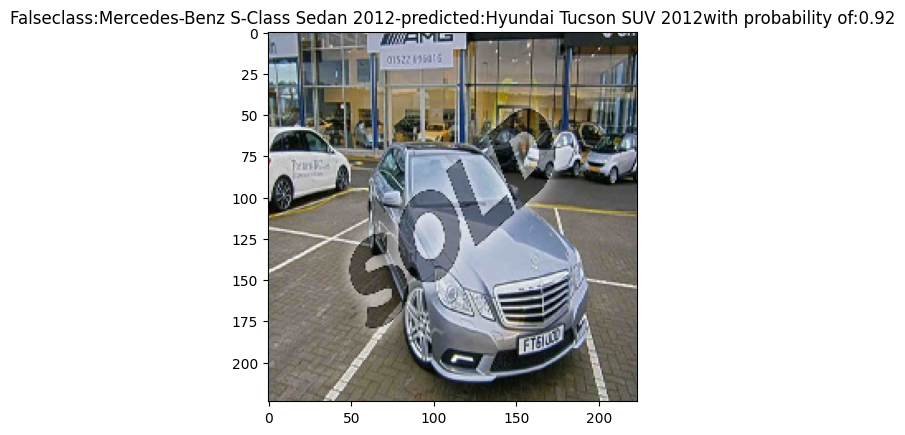

In [ ]:
predict_class(model_2)